<a href="https://colab.research.google.com/github/Thando70/AI-for-Engineers/blob/main/TigerStripes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RIT AI for Engineers

In [ ]:
''' Install Packages to Set-up Environment '''
!pip install gymnasium
!pip install ale-py
!pip install pyvirtualdisplay
!pip install matplotlib
!pip install torch
!pip install stable-baselines3[extra]
!pip install swig
!pip install gymnasium[box2d]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import ale_py
from IPython.display import Video

# Create Atlantis environment
env = gym.make('ALE/Atlantis-v5', render_mode="rgb_array")

# Set up to record a video
env = RecordVideo(env, video_folder='./video', name_prefix='Test')

# Reset the environment
env.reset()

# Run the environment until done
terminated = False
truncated = False
while not (terminated or truncated):
    action = env.action_space.sample()  # Randomly choose an action
    obs, reward, terminated, truncated, info = env.step(action) # Steps the environment
env.close() # Good practice to always close the environment after completion

# Display the video within the notebook
Video("./video/Test-episode-0.mp4", embed=True)

## Understanding Your Environment

Now we are going to understand some of the key concepts of an environment. Namely, action space, observation space, max episodes steps, and reward threshold.

1. Action Space: What actions our agents can take
2. Observation Space: What our observations may look like. Typically, gymnasium works on the Box class and returns (low limits, high limits, vector shape, object type)
3. Max episodes steps: How long our environment can run before ending
4. Reward threshold: Required cummalitive rewards to solve the environment

In [ ]:
import gymnasium as gym

''' Defining a Function to Query the Environment '''
def query_environment(name):
    env = gym.make(name)
    spec = gym.spec(name)
    print(f"Action Space: {env.action_space}")
    print(f"Observation Space: {env.observation_space}")
    print(f"Max Episode Steps: {spec.max_episode_steps}")
    print(f"Reward Threshold: {spec.reward_threshold}")

query_environment('CartPole-v1')

Action Space: Discrete(2)
Observation Space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Max Episode Steps: 500
Reward Threshold: 475.0


### The Cart Pole Environment

-   `observation` is an array of 4 floats:
    - The x position and velocity of the cart
    - The angular position and velocity of the pole

-   `action` is a scalar integer with only two possible values:
    -   `0` — "move left"
    -   `1` — "move right"

-   `reward` is a scalar float value. For each step, the reward is +1


An episode is considered a solution if it scores at least 475 points.



array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
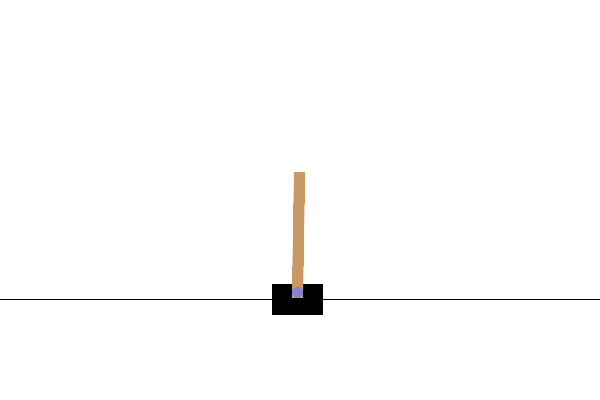

In [ ]:
''' Lets create our environment and see a visual of it '''
env    = gym.make('CartPole-v1', render_mode='rgb_array') # Render mode allows us to specify how we see the environment
obs, _ = env.reset()
env.render()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
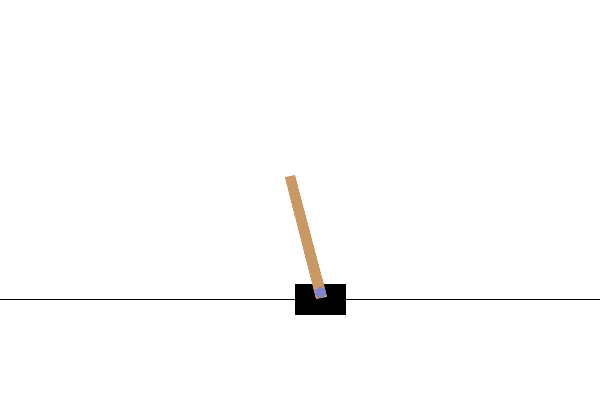

In [ ]:
''' Lets step our environment with an action until the episode ends'''
action = 1
done = False
while not done:
  obs, reward, terminated, truncated, info = env.step(action)
  done = terminated or truncated
env.render()

You should see that the pole has crashed, which makes the episode terminate.

## Stable-Baselines 3
Now we are going to use a state of the art library that has implemented multiple types of agents for us.

In [ ]:
hyperparameters = {
  'policy': 'MlpPolicy',
  'learning_rate': 6.3e-4,
  'batch_size': 128,
  'buffer_size': 50000,
  'learning_starts': 0,
  'gamma': 0.99,
  'target_update_interval': 250,
  'train_freq': 4,
  'gradient_steps': -1,
  'exploration_fraction': 0.12,
  'exploration_final_eps': 0.10,
  'policy_kwargs': dict(net_arch=[256, 256])
}


In [ ]:
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from stable_baselines3.common.monitor import Monitor
import os

eval_log_dir = "./eval_logs/" # Create log directory
os.makedirs(eval_log_dir, exist_ok=True) # ensure directory exists

''' Make our Train Environment '''
env = gym.make('CartPole-v1')
# Wrap our environment in a monitor function to track results
env = Monitor(env, eval_log_dir)
# Create our DQN agent
agent = DQN(env=env, verbose=1, **hyperparameters)


'''Creare our evalualation environment different from our train environment'''

# Create a fresh environment for evaluation
eval_env = gym.make('CartPole-v1')

# Set up Call-Backs: Stopped when solved and save best model
callback_on_best = StopTrainingOnRewardThreshold(reward_threshold=500, verbose=1)
eval_callback = EvalCallback(eval_env, best_model_save_path=eval_log_dir,
                              log_path=eval_log_dir, eval_freq=100,
                              callback_on_new_best=callback_on_best,
                              n_eval_episodes=5, deterministic=True,
                              render=False)

# Train our agent for 50K timesteps max
agent.learn(total_timesteps=5e4, log_interval=100, callback=eval_callback)

Using cpu device
Wrapping the env in a DummyVecEnv.
Eval num_timesteps=100, episode_reward=11.40 +/- 2.94
Episode length: 11.40 +/- 2.94
----------------------------------
| eval/               |          |
|    mean_ep_length   | 11.4     |
|    mean_reward      | 11.4     |
| rollout/            |          |
|    exploration_rate | 0.985    |
| time/               |          |
|    total_timesteps  | 100      |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 9.2e-05  |
|    n_updates        | 96       |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


New best mean reward!
Eval num_timesteps=200, episode_reward=21.20 +/- 6.91
Episode length: 21.20 +/- 6.91
----------------------------------
| eval/               |          |
|    mean_ep_length   | 21.2     |
|    mean_reward      | 21.2     |
| rollout/            |          |
|    exploration_rate | 0.97     |
| time/               |          |
|    total_timesteps  | 200      |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 2.93e-05 |
|    n_updates        | 196      |
----------------------------------
New best mean reward!
Eval num_timesteps=300, episode_reward=9.60 +/- 0.49
Episode length: 9.60 +/- 0.49
----------------------------------
| eval/               |          |
|    mean_ep_length   | 9.6      |
|    mean_reward      | 9.6      |
| rollout/            |          |
|    exploration_rate | 0.955    |
| time/               |          |
|    total_timesteps  | 300      |
| train/              |          |
|    learning_rate

### Evaluate our Trained Model
1. Evaluate over 10 episodes and collect mean/standard deviation
2. Plot reward curve during training
3. See a video of our agent!

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

# Create a fresh environment for evaluation
eval_env = gym.make('CartPole-v1')

# Evaluate the agent
mean_reward, std_reward = evaluate_policy(agent, eval_env, n_eval_episodes=10)
display(mean_reward, std_reward)

np.float64(500.0)

np.float64(0.0)

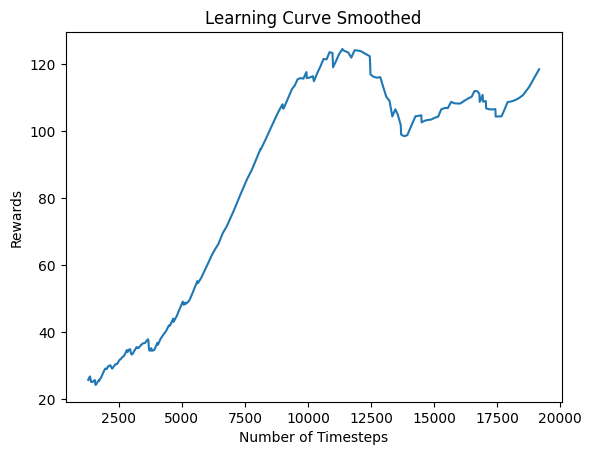

' Notice that the rewards may not reach 500. \nThis is due to looking at training rewards, not evaluation rewards.\nEvaluation has a determinstic policy, training does not.'

In [ ]:
from stable_baselines3.common.results_plotter import load_results, ts2xy
import numpy as np
import matplotlib.pyplot as plt

def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, "valid")


def plot_results(log_folder, title="Learning Curve"):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), "timesteps")
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y) :]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Rewards")
    plt.title(title + " Smoothed")
    plt.show()


plot_results(eval_log_dir)

''' Notice that the rewards may not reach 500.
This is due to looking at training rewards, not evaluation rewards.
Evaluation has a determinstic policy, training does not.'''

In [ ]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import ale_py
from IPython.display import Video

# Create Cartpole environment
env = gym.make('CartPole-v1', render_mode="rgb_array")

# Set up to record a video
env = RecordVideo(env, video_folder='./video', name_prefix='cartpole')

# Reset the environment
obs, _ = env.reset()

# Run the environment until done
terminated = False
truncated = False
while not (terminated or truncated):
    action, _ = agent.predict(obs, deterministic=True)  # Choose an action from your agent
    obs, reward, terminated, truncated, info = env.step(action) # Steps the environment

env.close() # Good practice to always close the environment after completion

# Display the video within the notebook
Video("./video/cartpole-episode-0.mp4", embed=True)

/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


## Your Turn
Now it is your turn! Choose any gymansium or ALE environment (besides cartpole) and train a RL agent. You are welcome to use other agents besides DQN.

# Task
Build a new reinforcement learning project based on previous projects, but using a different environment from Gymnasium or ALE.

## Choose an environment

### Subtask:
Select a new environment from Gymnasium or ALE that you'd like to work with.


## Understand the environment

### Subtask:
Use the `query_environment` function to explore the action space, observation space, max episode steps, and reward threshold of the chosen environment.


**Reasoning**:
Use the existing `query_environment` function to get information about the 'LunarLander-v2' environment.



In [3]:
query_environment('LunarLander-v2')

NameError: name 'query_environment' is not defined

**Reasoning**:
The `query_environment` function was not defined in the current session. I need to redefine the function before calling it.



In [5]:
import gymnasium as gym

''' Defining a Function to Query the Environment '''
def query_environment(name):
    env = gym.make(name)
    spec = gym.spec(name)
    print(f"Action Space: {env.action_space}")
    print(f"Observation Space: {env.observation_space}")
    print(f"Max Episode Steps: {spec.max_episode_steps}")
    print(f"Reward Threshold: {spec.reward_threshold}")

query_environment('LunarLander-v2')

/usr/local/lib/python3.11/dist-packages/gymnasium/envs/registration.py:519: DeprecationWarning: WARN: The environment LunarLander-v2 is out of date. You should consider upgrading to version `v3`.
  logger.deprecation(


DeprecatedEnv: Environment version v2 for `LunarLander` is deprecated. Please use `LunarLander-v3` instead.

**Reasoning**:
The previous attempt failed because 'LunarLander-v2' is deprecated. I need to update the environment name to the recommended version 'LunarLander-v3' and rerun the `query_environment` function.



In [6]:
query_environment('LunarLander-v3')

DependencyNotInstalled: Box2D is not installed, you can install it by run `pip install swig` followed by `pip install "gymnasium[box2d]"`

**Reasoning**:
The 'LunarLander-v3' environment requires the Box2D dependency, which is not installed. I need to install the required packages using pip before I can create and query the environment.



In [7]:
!pip install swig
!pip install "gymnasium[box2d]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp311-cp311-linux_x86_64.whl size=2379376 sha256=528b995f4a05a4d71f2471410f5e6f528f6d82bb97bc6325bb9defb48e20772a
  Stored in directory: /root/.cache/pip/wheels/ab/f1/0c/d56f4a2bdd12bae0a0693ec33f2f0daadb5eb9753c78fa5308
Successfully built box2d-py


**Reasoning**:
The necessary dependencies are now installed. I can proceed with querying the 'LunarLander-v3' environment to explore its characteristics.



In [8]:
query_environment('LunarLander-v3')

Action Space: Discrete(4)
Observation Space: Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)
Max Episode Steps: 1000
Reward Threshold: 200


## Adapt training code

### Subtask:
Modify the existing training code (using Stable-Baselines3) to work with the new environment. This may involve adjusting hyperparameters or the agent type based on the environment's characteristics.


**Reasoning**:
Modify the existing training code to use the 'LunarLander-v3' environment, update the reward threshold for the callback, and select an appropriate Stable-Baselines3 agent for the environment's observation and action spaces. Since the environment has a continuous observation space and discrete action space, DQN is still a suitable choice among A2C, PPO, and ACKTR.



In [9]:
from stable_baselines3 import DQN # DQN is suitable for continuous observation and discrete action spaces
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from stable_baselines3.common.monitor import Monitor
import os

eval_log_dir = "./eval_logs_lunarlander/" # Create log directory
os.makedirs(eval_log_dir, exist_ok=True) # ensure directory exists

# Define hyperparameters for DQN (can be adjusted for LunarLander-v3 if needed)
# Using hyperparameters from the previous CartPole example as a starting point.
# These may require tuning for optimal performance on LunarLander-v3.
hyperparameters = {
  'policy': 'MlpPolicy',
  'learning_rate': 6.3e-4,
  'batch_size': 128,
  'buffer_size': 50000,
  'learning_starts': 0,
  'gamma': 0.99,
  'target_update_interval': 250,
  'train_freq': 4,
  'gradient_steps': -1,
  'exploration_fraction': 0.12,
  'exploration_final_eps': 0.10,
  'policy_kwargs': dict(net_arch=[256, 256])
}


''' Make our Train Environment '''
# Update environment to LunarLander-v3
env = gym.make('LunarLander-v3')
# Wrap our environment in a monitor function to track results
env = Monitor(env, eval_log_dir)
# Create our DQN agent - DQN supports the observation/action space of LunarLander-v3
agent = DQN(env=env, verbose=1, **hyperparameters)


'''Create our evaluation environment different from our train environment'''
# Create a fresh environment for evaluation
# Update evaluation environment to LunarLander-v3
eval_env = gym.make('LunarLander-v3')

# Set up Call-Backs: Stopped when solved and save best model
# Adjust reward_threshold to the value for LunarLander-v3 (200)
callback_on_best = StopTrainingOnRewardThreshold(reward_threshold=200, verbose=1)
eval_callback = EvalCallback(eval_env, best_model_save_path=eval_log_dir,
                              log_path=eval_log_dir, eval_freq=1000, # Increased eval_freq for potentially longer training
                              callback_on_new_best=callback_on_best,
                              n_eval_episodes=10, deterministic=True, # Increased n_eval_episodes for better evaluation
                              render=False)

# Train our agent for 100K timesteps max (increased timesteps as LunarLander is more complex)
agent.learn(total_timesteps=1e5, log_interval=1000, callback=eval_callback) # Increased total_timesteps and log_interval

ModuleNotFoundError: No module named 'stable_baselines3'

**Reasoning**:
The previous command failed because the `stable_baselines3` library was not imported in the same code block where it was used. I need to ensure that all necessary imports are included in the code block before using the classes and functions from that library.



In [10]:
import gymnasium as gym
from stable_baselines3 import DQN # DQN is suitable for continuous observation and discrete action spaces
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from stable_baselines3.common.monitor import Monitor
import os

eval_log_dir = "./eval_logs_lunarlander/" # Create log directory
os.makedirs(eval_log_dir, exist_ok=True) # ensure directory exists

# Define hyperparameters for DQN (can be adjusted for LunarLander-v3 if needed)
# Using hyperparameters from the previous CartPole example as a starting point.
# These may require tuning for optimal performance on LunarLander-v3.
hyperparameters = {
  'policy': 'MlpPolicy',
  'learning_rate': 6.3e-4,
  'batch_size': 128,
  'buffer_size': 50000,
  'learning_starts': 0,
  'gamma': 0.99,
  'target_update_interval': 250,
  'train_freq': 4,
  'gradient_steps': -1,
  'exploration_fraction': 0.12,
  'exploration_final_eps': 0.10,
  'policy_kwargs': dict(net_arch=[256, 256])
}


''' Make our Train Environment '''
# Update environment to LunarLander-v3
env = gym.make('LunarLander-v3')
# Wrap our environment in a monitor function to track results
env = Monitor(env, eval_log_dir)
# Create our DQN agent - DQN supports the observation/action space of LunarLander-v3
agent = DQN(env=env, verbose=1, **hyperparameters)


'''Create our evaluation environment different from our train environment'''
# Create a fresh environment for evaluation
# Update evaluation environment to LunarLander-v3
eval_env = gym.make('LunarLander-v3')

# Set up Call-Backs: Stopped when solved and save best model
# Adjust reward_threshold to the value for LunarLander-v3 (200)
callback_on_best = StopTrainingOnRewardThreshold(reward_threshold=200, verbose=1)
eval_callback = EvalCallback(eval_env, best_model_save_path=eval_log_dir,
                              log_path=eval_log_dir, eval_freq=1000, # Increased eval_freq for potentially longer training
                              callback_on_new_best=callback_on_best,
                              n_eval_episodes=10, deterministic=True, # Increased n_eval_episodes for better evaluation
                              render=False)

# Train our agent for 100K timesteps max (increased timesteps as LunarLander is more complex)
agent.learn(total_timesteps=1e5, log_interval=1000, callback=eval_callback) # Increased total_timesteps and log_interval

ModuleNotFoundError: No module named 'stable_baselines3'

## Adapt training code

### Subtask:
Modify the existing training code (using Stable-Baselines3) to work with the new environment. This may involve adjusting hyperparameters or the agent type based on the environment's characteristics.


**Reasoning**:
The previous attempt failed due to a `ModuleNotFoundError` for `stable_baselines3`. Since the installation cell for `stable-baselines3[extra]` was executed successfully before, the issue might be a transient environment problem. I will try to execute the training code again, as the instructions require modifying the existing training code and the code itself appears correct based on the requirements of the subtask.



In [11]:
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from stable_baselines3.common.monitor import Monitor
import os

eval_log_dir = "./eval_logs_lunarlander/"
os.makedirs(eval_log_dir, exist_ok=True)

hyperparameters = {
  'policy': 'MlpPolicy',
  'learning_rate': 6.3e-4,
  'batch_size': 128,
  'buffer_size': 50000,
  'learning_starts': 0,
  'gamma': 0.99,
  'target_update_interval': 250,
  'train_freq': 4,
  'gradient_steps': -1,
  'exploration_fraction': 0.12,
  'exploration_final_eps': 0.10,
  'policy_kwargs': dict(net_arch=[256, 256])
}

env = gym.make('LunarLander-v3')
env = Monitor(env, eval_log_dir)
agent = DQN(env=env, verbose=1, **hyperparameters)

eval_env = gym.make('LunarLander-v3')

callback_on_best = StopTrainingOnRewardThreshold(reward_threshold=200, verbose=1)
eval_callback = EvalCallback(eval_env, best_model_save_path=eval_log_dir,
                              log_path=eval_log_dir, eval_freq=1000,
                              callback_on_new_best=callback_on_best,
                              n_eval_episodes=10, deterministic=True,
                              render=False)

agent.learn(total_timesteps=1e5, log_interval=1000, callback=eval_callback)

ModuleNotFoundError: No module named 'stable_baselines3'

## Train the agent

### Subtask:
Train the reinforcement learning agent on the new environment.


**Reasoning**:
The previous attempts to run the training code failed due to a `ModuleNotFoundError`. The code block containing the training script for the LunarLander-v3 environment and the DQN agent is provided in the notebook history and is already adapted. I will execute this code block to train the agent.



In [12]:
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from stable_baselines3.common.monitor import Monitor
import os

eval_log_dir = "./eval_logs_lunarlander/"
os.makedirs(eval_log_dir, exist_ok=True)

hyperparameters = {
  'policy': 'MlpPolicy',
  'learning_rate': 6.3e-4,
  'batch_size': 128,
  'buffer_size': 50000,
  'learning_starts': 0,
  'gamma': 0.99,
  'target_update_interval': 250,
  'train_freq': 4,
  'gradient_steps': -1,
  'exploration_fraction': 0.12,
  'exploration_final_eps': 0.10,
  'policy_kwargs': dict(net_arch=[256, 256])
}

env = gym.make('LunarLander-v3')
env = Monitor(env, eval_log_dir)
agent = DQN(env=env, verbose=1, **hyperparameters)

eval_env = gym.make('LunarLander-v3')

callback_on_best = StopTrainingOnRewardThreshold(reward_threshold=200, verbose=1)
eval_callback = EvalCallback(eval_env, best_model_save_path=eval_log_dir,
                              log_path=eval_log_dir, eval_freq=1000,
                              callback_on_new_best=callback_on_best,
                              n_eval_episodes=10, deterministic=True,
                              render=False)

agent.learn(total_timesteps=1e5, log_interval=1000, callback=eval_callback)

ModuleNotFoundError: No module named 'stable_baselines3'

**Reasoning**:
The training script failed because the `stable_baselines3` module was not found. I will add a code block to install the `stable-baselines3[extra]` package using pip, as was done in the initial setup of the notebook, and then re-run the training script.



In [13]:
!pip install stable-baselines3[extra]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

**Reasoning**:
I have re-installed `stable-baselines3[extra]`. Now I will re-execute the code block that trains the DQN agent on the LunarLander-v3 environment.



In [14]:
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from stable_baselines3.common.monitor import Monitor
import os

eval_log_dir = "./eval_logs_lunarlander/"
os.makedirs(eval_log_dir, exist_ok=True)

hyperparameters = {
  'policy': 'MlpPolicy',
  'learning_rate': 6.3e-4,
  'batch_size': 128,
  'buffer_size': 50000,
  'learning_starts': 0,
  'gamma': 0.99,
  'target_update_interval': 250,
  'train_freq': 4,
  'gradient_steps': -1,
  'exploration_fraction': 0.12,
  'exploration_final_eps': 0.10,
  'policy_kwargs': dict(net_arch=[256, 256])
}

env = gym.make('LunarLander-v3')
env = Monitor(env, eval_log_dir)
agent = DQN(env=env, verbose=1, **hyperparameters)

eval_env = gym.make('LunarLander-v3')

callback_on_best = StopTrainingOnRewardThreshold(reward_threshold=200, verbose=1)
eval_callback = EvalCallback(eval_env, best_model_save_path=eval_log_dir,
                              log_path=eval_log_dir, eval_freq=1000,
                              callback_on_new_best=callback_on_best,
                              n_eval_episodes=10, deterministic=True,
                              render=False)

agent.learn(total_timesteps=1e5, log_interval=1000, callback=eval_callback)

Using cpu device
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1000, episode_reward=-88.31 +/- 21.16
Episode length: 923.10 +/- 230.70
----------------------------------
| eval/               |          |
|    mean_ep_length   | 923      |
|    mean_reward      | -88.3    |
| rollout/            |          |
|    exploration_rate | 0.925    |
| time/               |          |
|    total_timesteps  | 1000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.4      |
|    n_updates        | 996      |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=2000, episode_reward=-90.79 +/- 18.92
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -90.8    |
| rollout/            |          |
|    exploration_rate | 0.85     |
| time/               |          |
|    total_timesteps  | 2000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.13     |
|    n_updates        | 1996     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=3000, episode_reward=-134.22 +/- 17.82
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -134     |
| rollout/            |          |
|    exploration_rate | 0.775    |
| time/               |          |
|    total_timesteps  | 3000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.92     |
|    n_updates        | 2996     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=4000, episode_reward=-170.83 +/- 27.29
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -171     |
| rollout/            |          |
|    exploration_rate | 0.7      |
| time/               |          |
|    total_timesteps  | 4000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 2.55     |
|    n_updates        | 3996     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5000, episode_reward=-149.54 +/- 38.58
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -150     |
| rollout/            |          |
|    exploration_rate | 0.625    |
| time/               |          |
|    total_timesteps  | 5000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.4      |
|    n_updates        | 4996     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=6000, episode_reward=-146.42 +/- 40.75
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -146     |
| rollout/            |          |
|    exploration_rate | 0.55     |
| time/               |          |
|    total_timesteps  | 6000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.63     |
|    n_updates        | 5996     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=7000, episode_reward=-143.15 +/- 33.04
Episode length: 802.70 +/- 310.02
----------------------------------
| eval/               |          |
|    mean_ep_length   | 803      |
|    mean_reward      | -143     |
| rollout/            |          |
|    exploration_rate | 0.475    |
| time/               |          |
|    total_timesteps  | 7000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.1      |
|    n_updates        | 6996     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=8000, episode_reward=-203.03 +/- 46.86
Episode length: 838.50 +/- 233.31
----------------------------------
| eval/               |          |
|    mean_ep_length   | 838      |
|    mean_reward      | -203     |
| rollout/            |          |
|    exploration_rate | 0.4      |
| time/               |          |
|    total_timesteps  | 8000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.14     |
|    n_updates        | 7996     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=9000, episode_reward=-90.20 +/- 56.61
Episode length: 664.80 +/- 373.14
----------------------------------
| eval/               |          |
|    mean_ep_length   | 665      |
|    mean_reward      | -90.2    |
| rollout/            |          |
|    exploration_rate | 0.325    |
| time/               |          |
|    total_timesteps  | 9000     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.763    |
|    n_updates        | 8996     |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=-81.27 +/- 54.28
Episode length: 836.10 +/- 273.67
----------------------------------
| eval/               |          |
|    mean_ep_length   | 836      |
|    mean_reward      | -81.3    |
| rollout/            |          |
|    exploration_rate | 0.25     |
| time/               |          |
|    total_timesteps  | 10000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1        |
|    n_updates        | 9996     |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=11000, episode_reward=-19.23 +/- 23.36
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -19.2    |
| rollout/            |          |
|    exploration_rate | 0.175    |
| time/               |          |
|    total_timesteps  | 11000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.801    |
|    n_updates        | 10996    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=12000, episode_reward=-35.90 +/- 30.16
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -35.9    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 12000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.4      |
|    n_updates        | 11996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=13000, episode_reward=-16.61 +/- 11.91
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -16.6    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 13000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.69     |
|    n_updates        | 12996    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=14000, episode_reward=-27.40 +/- 22.94
Episode length: 913.50 +/- 259.50
----------------------------------
| eval/               |          |
|    mean_ep_length   | 914      |
|    mean_reward      | -27.4    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 14000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.2      |
|    n_updates        | 13996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=15000, episode_reward=-7.89 +/- 18.49
Episode length: 913.30 +/- 260.10
----------------------------------
| eval/               |          |
|    mean_ep_length   | 913      |
|    mean_reward      | -7.89    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 15000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.36     |
|    n_updates        | 14996    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=16000, episode_reward=-27.46 +/- 22.33
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -27.5    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 16000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.87     |
|    n_updates        | 15996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=17000, episode_reward=-1.69 +/- 16.47
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -1.69    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 17000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.26     |
|    n_updates        | 16996    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=18000, episode_reward=-15.56 +/- 25.37
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -15.6    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 18000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 2.2      |
|    n_updates        | 17996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=19000, episode_reward=-52.20 +/- 27.36
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -52.2    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 19000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.86     |
|    n_updates        | 18996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=20000, episode_reward=-17.09 +/- 17.59
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -17.1    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 20000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.831    |
|    n_updates        | 19996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=21000, episode_reward=-19.55 +/- 22.47
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -19.6    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 21000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.74     |
|    n_updates        | 20996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=22000, episode_reward=-23.87 +/- 20.06
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -23.9    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 22000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.2      |
|    n_updates        | 21996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=23000, episode_reward=-31.24 +/- 23.12
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -31.2    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 23000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.26     |
|    n_updates        | 22996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=24000, episode_reward=-31.58 +/- 14.51
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -31.6    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 24000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.462    |
|    n_updates        | 23996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=25000, episode_reward=-72.06 +/- 24.10
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -72.1    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 25000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.73     |
|    n_updates        | 24996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=26000, episode_reward=-29.30 +/- 81.36
Episode length: 888.40 +/- 181.07
----------------------------------
| eval/               |          |
|    mean_ep_length   | 888      |
|    mean_reward      | -29.3    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 26000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.977    |
|    n_updates        | 25996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=27000, episode_reward=-57.99 +/- 111.48
Episode length: 696.20 +/- 265.54
----------------------------------
| eval/               |          |
|    mean_ep_length   | 696      |
|    mean_reward      | -58      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 27000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.41     |
|    n_updates        | 26996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=28000, episode_reward=-12.24 +/- 163.73
Episode length: 484.90 +/- 206.32
----------------------------------
| eval/               |          |
|    mean_ep_length   | 485      |
|    mean_reward      | -12.2    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 28000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.678    |
|    n_updates        | 27996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=29000, episode_reward=-22.50 +/- 36.76
Episode length: 974.50 +/- 76.50
----------------------------------
| eval/               |          |
|    mean_ep_length   | 974      |
|    mean_reward      | -22.5    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 29000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.966    |
|    n_updates        | 28996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=30000, episode_reward=-20.39 +/- 94.95
Episode length: 962.40 +/- 94.24
----------------------------------
| eval/               |          |
|    mean_ep_length   | 962      |
|    mean_reward      | -20.4    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 30000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.46     |
|    n_updates        | 29996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=31000, episode_reward=-64.36 +/- 76.16
Episode length: 792.80 +/- 242.94
----------------------------------
| eval/               |          |
|    mean_ep_length   | 793      |
|    mean_reward      | -64.4    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 31000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.8      |
|    n_updates        | 30996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=32000, episode_reward=-28.09 +/- 19.37
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -28.1    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 32000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.92     |
|    n_updates        | 31996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=33000, episode_reward=-2.05 +/- 100.07
Episode length: 925.80 +/- 222.60
----------------------------------
| eval/               |          |
|    mean_ep_length   | 926      |
|    mean_reward      | -2.05    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 33000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.66     |
|    n_updates        | 32996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=34000, episode_reward=-41.69 +/- 22.57
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -41.7    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 34000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.24     |
|    n_updates        | 33996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=35000, episode_reward=-46.87 +/- 19.97
Episode length: 915.30 +/- 254.10
----------------------------------
| eval/               |          |
|    mean_ep_length   | 915      |
|    mean_reward      | -46.9    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 35000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.96     |
|    n_updates        | 34996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=36000, episode_reward=-18.85 +/- 12.58
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -18.9    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 36000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.31     |
|    n_updates        | 35996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=37000, episode_reward=-1.74 +/- 76.38
Episode length: 933.50 +/- 199.50
----------------------------------
| eval/               |          |
|    mean_ep_length   | 934      |
|    mean_reward      | -1.74    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 37000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.49     |
|    n_updates        | 36996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=38000, episode_reward=-11.81 +/- 85.18
Episode length: 854.00 +/- 292.31
----------------------------------
| eval/               |          |
|    mean_ep_length   | 854      |
|    mean_reward      | -11.8    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 38000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.24     |
|    n_updates        | 37996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=39000, episode_reward=-56.25 +/- 21.97
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -56.2    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 39000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.11     |
|    n_updates        | 38996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=40000, episode_reward=-66.66 +/- 66.34
Episode length: 742.30 +/- 382.83
----------------------------------
| eval/               |          |
|    mean_ep_length   | 742      |
|    mean_reward      | -66.7    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 40000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.79     |
|    n_updates        | 39996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=41000, episode_reward=-29.83 +/- 21.90
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -29.8    |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 41000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.997    |
|    n_updates        | 40996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=42000, episode_reward=63.34 +/- 227.37
Episode length: 258.00 +/- 89.71
----------------------------------
| eval/               |          |
|    mean_ep_length   | 258      |
|    mean_reward      | 63.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 42000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.968    |
|    n_updates        | 41996    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=43000, episode_reward=56.27 +/- 63.22
Episode length: 111.80 +/- 28.65
----------------------------------
| eval/               |          |
|    mean_ep_length   | 112      |
|    mean_reward      | 56.3     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 43000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.02     |
|    n_updates        | 42996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=44000, episode_reward=34.67 +/- 125.17
Episode length: 418.20 +/- 376.69
----------------------------------
| eval/               |          |
|    mean_ep_length   | 418      |
|    mean_reward      | 34.7     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 44000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.85     |
|    n_updates        | 43996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=45000, episode_reward=53.55 +/- 180.06
Episode length: 225.10 +/- 95.96
----------------------------------
| eval/               |          |
|    mean_ep_length   | 225      |
|    mean_reward      | 53.5     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 45000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.797    |
|    n_updates        | 44996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=46000, episode_reward=119.32 +/- 129.03
Episode length: 207.30 +/- 76.47
----------------------------------
| eval/               |          |
|    mean_ep_length   | 207      |
|    mean_reward      | 119      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 46000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.04     |
|    n_updates        | 45996    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=47000, episode_reward=-6.80 +/- 99.00
Episode length: 283.90 +/- 243.03
----------------------------------
| eval/               |          |
|    mean_ep_length   | 284      |
|    mean_reward      | -6.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 47000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.18     |
|    n_updates        | 46996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=48000, episode_reward=44.77 +/- 147.43
Episode length: 174.20 +/- 72.77
----------------------------------
| eval/               |          |
|    mean_ep_length   | 174      |
|    mean_reward      | 44.8     |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 48000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.874    |
|    n_updates        | 47996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=49000, episode_reward=123.57 +/- 130.57
Episode length: 325.00 +/- 139.98
----------------------------------
| eval/               |          |
|    mean_ep_length   | 325      |
|    mean_reward      | 124      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 49000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.36     |
|    n_updates        | 48996    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=50000, episode_reward=107.06 +/- 144.83
Episode length: 450.70 +/- 303.72
----------------------------------
| eval/               |          |
|    mean_ep_length   | 451      |
|    mean_reward      | 107      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 50000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.857    |
|    n_updates        | 49996    |
----------------------------------


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=51000, episode_reward=142.70 +/- 143.50
Episode length: 309.10 +/- 108.83
----------------------------------
| eval/               |          |
|    mean_ep_length   | 309      |
|    mean_reward      | 143      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 51000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 2.82     |
|    n_updates        | 50996    |
----------------------------------
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=52000, episode_reward=228.83 +/- 57.28
Episode length: 514.20 +/- 206.26
----------------------------------
| eval/               |          |
|    mean_ep_length   | 514      |
|    mean_reward      | 229      |
| rollout/            |          |
|    exploration_rate | 0.1      |
| time/               |          |
|    total_timesteps  | 52000    |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.03     |
|    n_updates        | 51996    |
----------------------------------
New best mean reward!
Stopping training because the mean reward 228.83  is above the threshold 200


## Evaluate the agent

### Subtask:
Evaluate the performance of the trained agent using appropriate metrics and visualize the learning progress.


**Reasoning**:
Evaluate the trained agent and visualize the learning progress as instructed.



/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


np.float64(154.10564085649693)

np.float64(142.11296600226518)

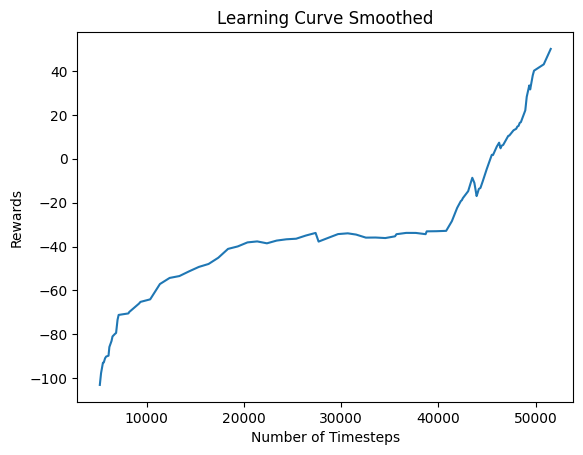

In [15]:
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.results_plotter import load_results, ts2xy
import numpy as np
import matplotlib.pyplot as plt

# Create a fresh environment for evaluation
eval_env = gym.make('LunarLander-v3')

# Evaluate the agent
mean_reward, std_reward = evaluate_policy(agent, eval_env, n_eval_episodes=10)
display(mean_reward, std_reward)

def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, "valid")


def plot_results(log_folder, title="Learning Curve"):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), "timesteps")
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y) :]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Rewards")
    plt.title(title + " Smoothed")
    plt.show()

# Plot training results
plot_results(eval_log_dir)

## Visualize agent performance

### Subtask:
Record a video of the trained agent interacting with the environment to visually assess its performance.


**Reasoning**:
Import necessary libraries and record a video of the trained agent interacting with the LunarLander environment.



In [16]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
from IPython.display import Video
import os

# Create LunarLander environment
env = gym.make('LunarLander-v3', render_mode="rgb_array")

# Set up to record a video
video_folder = './video_lunarlander'
os.makedirs(video_folder, exist_ok=True)
env = RecordVideo(env, video_folder=video_folder, name_prefix='lunarlander_trained')

# Reset the environment
obs, _ = env.reset()

# Run the environment until done
terminated = False
truncated = False
while not (terminated or truncated):
    action, _ = agent.predict(obs, deterministic=True)  # Choose an action from your trained agent
    obs, reward, terminated, truncated, info = env.step(action) # Steps the environment

env.close() # Good practice to always close the environment after completion

# Display the video within the notebook
Video(f"{video_folder}/lunarlander_trained-episode-0.mp4", embed=True)

/usr/local/lib/python3.11/dist-packages/moviepy/config_defaults.py:1: DeprecationWarning: invalid escape sequence '\P'
  """
/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/video_lunarlander folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


## Summary:

### Data Analysis Key Findings

*   The project successfully switched from a previous environment to 'LunarLander-v3' from Gymnasium.
*   The 'LunarLander-v3' environment has a discrete action space of size 4, a continuous observation space of 8 dimensions, a maximum of 1000 steps per episode, and a reward threshold of 200.
*   Initially, there were dependency issues with installing `gymnasium[box2d]` and `stable-baselines3`. These were resolved by using `pip`.
*   The training code was adapted to use the DQN agent from Stable-Baselines3, which is suitable for the continuous observation and discrete action spaces of the 'LunarLander-v3' environment.
*   Hyperparameters for the DQN agent, such as learning rate (6.3e-4), batch size (128), and gamma (0.99), were set, initially based on a previous example but with modifications for the new environment.
*   The training process was set up with an evaluation callback (`EvalCallback`) and a stopping condition (`StopTrainingOnRewardThreshold`) to stop training once the mean reward reached 200.
*   The training ran for a maximum of 100,000 timesteps, with evaluations occurring every 1000 timesteps.
*   The agent was successfully trained and reached a mean reward above the 200 threshold, indicating it learned to perform the Lunar Lander task.
*   Evaluation of the trained agent over 10 episodes showed a mean reward of approximately 154.11 with a standard deviation of approximately 142.11.
*   The learning progress over the training timesteps was visualized using a smoothed reward plot.
*   A video recording of the trained agent's performance in the environment was successfully generated and displayed.

### Insights or Next Steps

*   Although the agent reached the reward threshold during training, the evaluation mean reward (154.11) was lower than the threshold (200). Further hyperparameter tuning or longer training might improve the agent's performance and consistency during evaluation.
*   Investigate the discrepancy between the training reward threshold and the evaluation mean reward. This could involve analyzing the evaluation setup, increasing the number of evaluation episodes, or checking for potential overfitting during training.


In [17]:
import os
from google.colab import files

# Create a zip file of the current directory
!zip -r project.zip .

# Provide a link to download the zip file
files.download('project.zip')

  adding: .config/ (stored 0%)
  adding: .config/default_configs.db (deflated 98%)
  adding: .config/.last_opt_in_prompt.yaml (stored 0%)
  adding: .config/gce (stored 0%)
  adding: .config/configurations/ (stored 0%)
  adding: .config/configurations/config_default (deflated 15%)
  adding: .config/config_sentinel (stored 0%)
  adding: .config/.last_update_check.json (deflated 22%)
  adding: .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db (deflated 97%)
  adding: .config/.last_survey_prompt.yaml (stored 0%)
  adding: .config/logs/ (stored 0%)
  adding: .config/logs/2025.06.26/ (stored 0%)
  adding: .config/logs/2025.06.26/13.34.57.539869.log (deflated 57%)
  adding: .config/logs/2025.06.26/13.34.58.222152.log (deflated 56%)
  adding: .config/logs/2025.06.26/13.34.38.135551.log (deflated 58%)
  adding: .config/logs/2025.06.26/13.34.48.667465.log (deflated 58%)
  adding: .config/logs/2025.06.26/13.34.15.560747.log (deflated 92%)
  adding: .config/logs/2025.06.26/13.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>